# Stats and Analysis Notebook

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway

read clean data

In [2]:
gross_budget=pd.read_csv('../Data/clean_data/gross_budget.csv',index_col=0)

In [3]:
movie_genre_profit=pd.read_csv('../Data/clean_data/gross_budget_genre.csv',index_col=0)

In [4]:
gross_budget.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901
2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105
3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512
4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111


In [5]:
movie_genre_profit.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105,93.0,"Adventure,Animation,Comedy",6.3,167532.0
3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512,124.0,"Adventure,Drama,Fantasy",5.0,211733.0
4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0


Analysis and recommendation

In [6]:
# exploding genra column
movie_genre_profit=movie_genre_profit.assign(genres=movie_genre_profit.genres.str.split(",")).explode('genres')

In [7]:
movie_genre_profit.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,103.0,Adventure,8.3,682218.0
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,103.0,Animation,8.3,682218.0
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,103.0,Comedy,8.3,682218.0
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,148.0,Action,8.8,1841066.0
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,148.0,Adventure,8.8,1841066.0


In [61]:
corr=movie_genre_profit[['production_budget','net_profit' , 'domestic_gross_y','foreign_gross','worldwide_gross']].corr()

In [62]:
corr

,production_budget,net_profit,domestic_gross_y,foreign_gross,worldwide_gross
production_budget,1.000000,0.653570,0.700287,0.759516,0.777511
net_profit,0.653570,1.000000,0.934035,0.873388,0.984128
domestic_gross_y,0.700287,0.934035,1.000000,0.807420,0.940272
foreign_gross,0.759516,0.873388,0.807420,1.000000,0.903768
worldwide_gross,0.777511,0.984128,0.940272,0.903768,1.000000


In [58]:
movie_genre_profit.sort_values('foreign_gross' , ascending=False)

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,runtime_minutes,genres,averagerating,numvotes
874,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,141.0,Sci-Fi,7.3,665594.0
874,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,141.0,Adventure,7.3,665594.0
874,Avengers: Age of Ultron,946400000,330600000,459005868,1403013963,1072413963,324.384139,141.0,Action,7.3,665594.0
1361,Jurassic World: Fallen Kingdom,891800000,170000000,417719760,1305772799,1135772799,668.101646,128.0,Action,6.2,219125.0
1361,Jurassic World: Fallen Kingdom,891800000,170000000,417719760,1305772799,1135772799,668.101646,128.0,Adventure,6.2,219125.0
...,...,...,...,...,...,...,...,...,...,...,...
1188,The Darkness,0,4000000,10753574,10898293,6898293,172.457325,92.0,Horror,4.4,12435.0
1180,Jackie,0,9000000,13960394,36588512,27588512,306.539022,100.0,History,6.7,66008.0
1180,Jackie,0,9000000,13960394,36588512,27588512,306.539022,100.0,Drama,6.7,66008.0
1180,Jackie,0,9000000,13960394,36588512,27588512,306.539022,100.0,Biography,6.7,66008.0


In [45]:
genres_group_ROI=movie_genre_profit.groupby('genres')['ROI'].mean()
genres_group_ROI.sort_values(ascending=False)

genres
Horror         1266.272146
Mystery        1184.671123
Thriller        716.496328
Sport           370.518995
Documentary     339.749306
Romance         328.169415
Music           302.480779
Sci-Fi          302.180734
Animation       286.900802
Biography       283.826341
Comedy          274.316369
Drama           249.135773
Adventure       235.631451
Musical         231.131235
Fantasy         227.881679
Action          204.495216
Family          181.243727
History         181.073660
Crime           140.000568
Western          84.068855
War              57.951986
Name: ROI, dtype: float64

In [10]:
genres_group_production=movie_genre_profit.groupby('genres')['production_budget'].mean()
genres_group_production.sort_values(ascending=True)

genres
Documentary    8.160000e+06
Music          1.957500e+07
Horror         2.071752e+07
Romance        2.175326e+07
War            2.236364e+07
Biography      2.664658e+07
Mystery        2.683156e+07
Drama          2.819836e+07
Sport          3.228261e+07
Crime          3.394369e+07
History        3.726857e+07
Thriller       3.864555e+07
Comedy         4.268119e+07
Musical        5.432500e+07
Western        6.243750e+07
Family         6.741029e+07
Action         8.677390e+07
Fantasy        8.737474e+07
Sci-Fi         9.988978e+07
Animation      1.025353e+08
Adventure      1.107039e+08
Name: production_budget, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


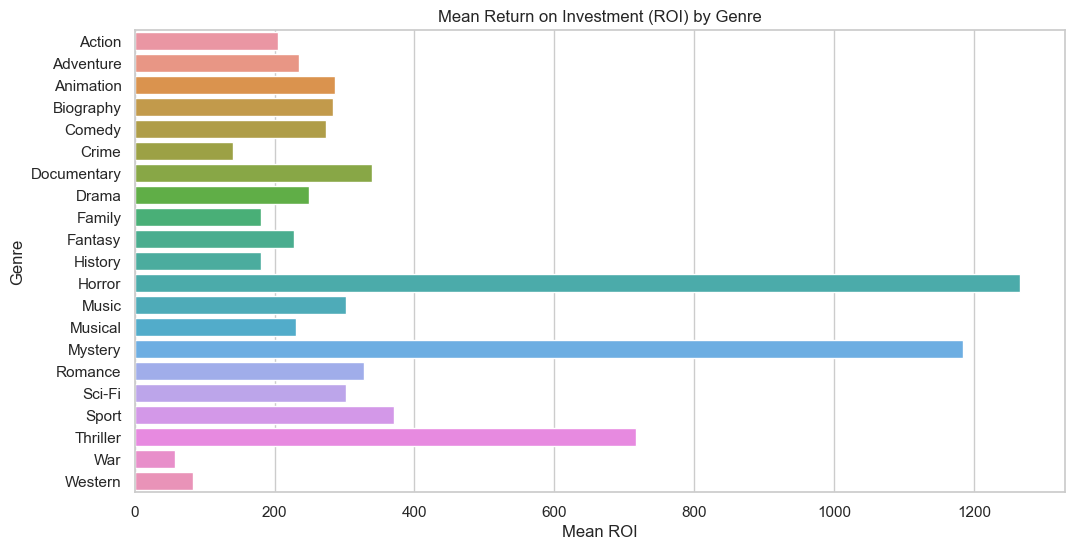

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_group_ROI.values, y=genres_group_ROI.index)
plt.title('Mean Return on Investment (ROI) by Genre')
plt.xlabel('Mean ROI')
plt.ylabel('Genre')
plt.show()

In [54]:
genres_group_ROI = movie_genre_profit.groupby('genres')['ROI'].mean()

unique_genres=movie_genre_profit.genres.unique()

roi_by_genre = [movie_genre_profit[movie_genre_profit['genres'] == genre]['ROI'] for genre in movie_genre_profit['genres'].unique()]

f_statistic, p_value = f_oneway(*roi_by_genre)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ROI among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean ROI among genres.")

4.217992310038506e-14
Reject the null hypothesis. There is a significant difference in mean ROI among genres.


In [57]:
# roi_by_genre2=pd.DataFrame(roi_by_genre)
# roi_by_genre2.hist(bins='auto')